<a href="https://colab.research.google.com/github/pulamolujahnavi/html-portfolio/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OASIS INFOBYTE

Intern :T.Helya

Domain:DATA SCIENCE

Task-4

TASK-Email Spam Detection with Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 1: Load the dataset (Assuming the dataset is in a CSV file)

df = pd.read_csv("/content/spam.csv",encoding='latin-1')


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.size

27860

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(4)

,v1,v2
4561,ham,How much u trying to get?
129,ham,K..k:)how much does it cost?
372,ham,I'm going for bath will msg you next &lt;#&gt...
2769,spam,Burger King - Wanna play footy at a top stadiu...


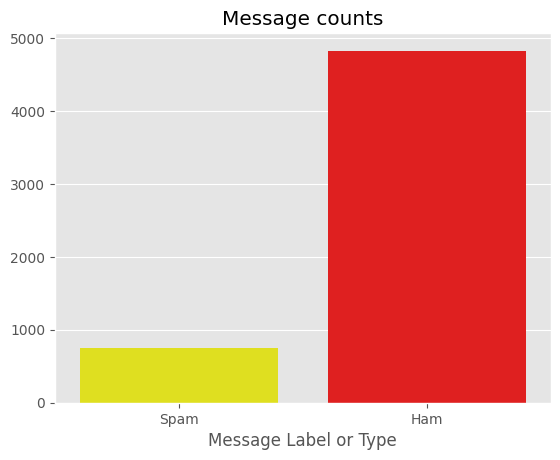

In [ ]:
# Visualizing ham and spam messages using bar plot
message_counts = [df[df['v1']=='spam'].shape[0], df[df['v1']=='ham'].shape[0]]
labels = ['Spam','Ham']
plt.title('Message counts')
plt.xlabel('Message Label or Type')
sns.barplot(x=labels,y=message_counts,palette=['yellow','red'])
plt.show()

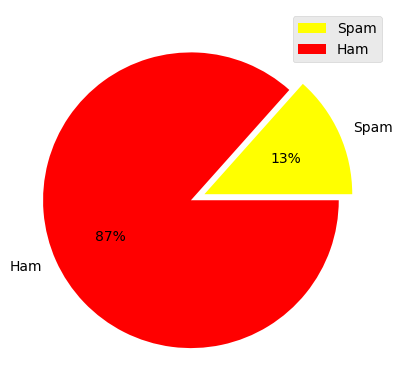

In [ ]:
# Visualizing ham and spam messages using pie chart
message_counts = [df[df['v1']=='spam'].shape[0], df[df['v1']=='ham'].shape[0]]
labels = ['Spam','Ham']
plt.pie(x=message_counts,explode=[0,0.1],labels=labels,autopct='%0.f%%',colors=['yellow','red'])
plt.legend()
plt.show()

In [ ]:
df.rename(columns={'v1': 'Target','v2': 'Text'},inplace = True)

In [ ]:
df.sample(4)

,v1,v2
5229,ham,It means u could not keep ur words.
4535,ham,Never blame a day in ur life. Good days give u...
223,ham,U say leh... Of course nothing happen lar. Not...
4466,ham,"She said,'' do u mind if I go into the bedroom..."


In [ ]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Checking for missing values in dataset
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
# Checking for duplicates value in dataset
df.duplicated().sum()

403

In [ ]:
# dropping all duplicated values
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [ ]:
# Adding columns for number of character
df['Num_characters'] = df['Text'].apply(len)
# Preview data
df.head()

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Adding columns for number of words in dataset
df['Num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
# Preview data
df.head()

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Adding columns for number of sentences in datase
df['Num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# Preview data
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)



In [ ]:
# Transforming text and adding it in new column
df['Transformed_text'] = df['Text'].apply(transform_text)
# Preview data
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Visualizing which word appeared more in ham and spam
# !pip install WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

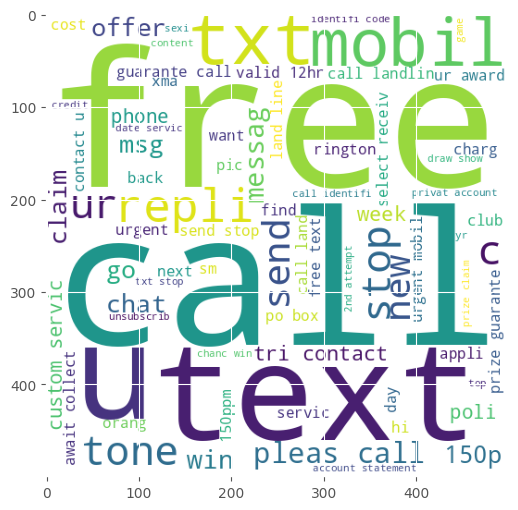

In [ ]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

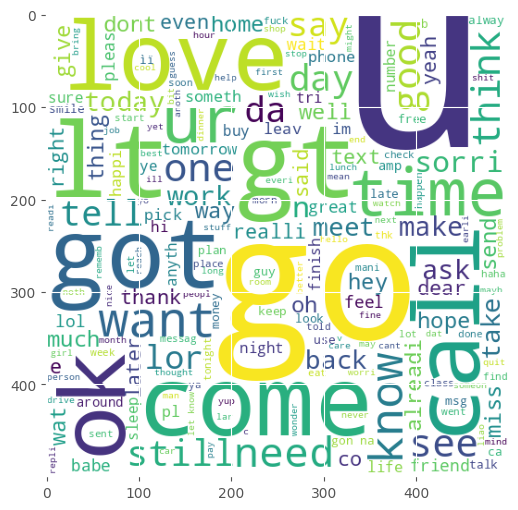

In [ ]:
# for ham message
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
# Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()
y = df['Target'].values

In [ ]:
# train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Model trainin
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)

In [ ]:
svc.fit(X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid', probability=True)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
# Model Evaluations
from sklearn.metrics import accuracy_score, precision_score
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9747899159663865
